## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].count()
mice_count

1893

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouseID = combined_data[combined_data.duplicated(['Mouse ID',])]
duplicate_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_data.drop_duplicates("Mouse ID")
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [12]:
# Checking the number of mice in the clean DataFrame.
number_of_mice=clean_dataframe['Mouse ID'].count()
number_of_mice

249

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_dataframe = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_dataframe

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

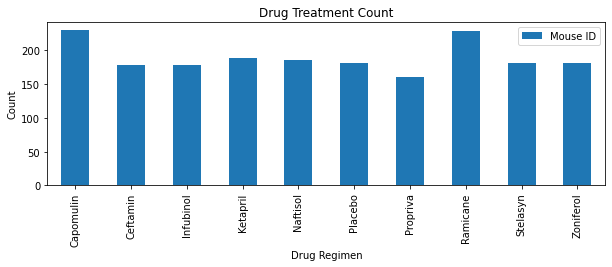

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_plot_pandas = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()

bar_plot_pandas = bar_plot_pandas[["Drug Regimen", "Mouse ID"]]
bar_plot_pandas = bar_plot_pandas.set_index("Drug Regimen")

bar_plot_pandas.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.ylabel("Count")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Count')

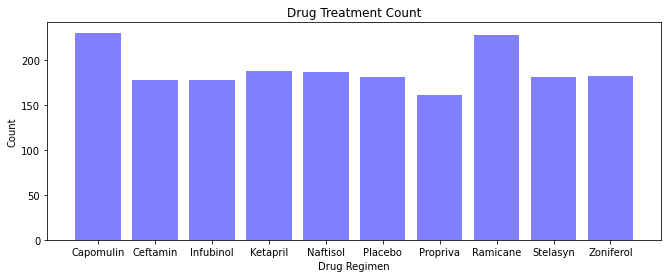

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

bar_pyplot = summary_dataframe.index.tolist()
drug_count = (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = np.arange(len(drug_count)) 

x_axis = bar_pyplot

plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color='b', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

Text(0, 0.5, '')

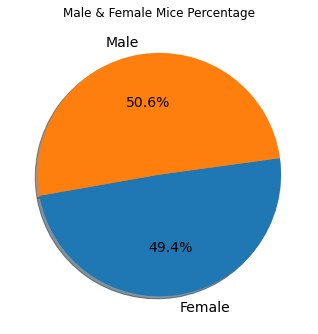

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = pd.DataFrame(combined_data.groupby(["Sex"]).count()).reset_index()
gender_data = gender_data[["Sex","Mouse ID"]]
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_data.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_data["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

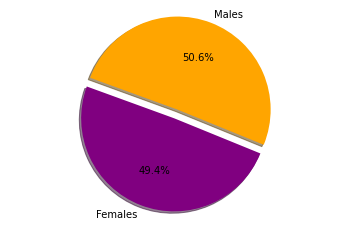

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = (combined_data.groupby(["Sex"])["Age_months"].count()).tolist()
labels = ["Females", "Males"]
colors = ["purple", "orange"]
explode = (0.1, 0)

plt.pie(gender_data, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = combined_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df=pd.merge(sorted_df, study_results)

In [25]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
capo_obj = merge_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    

    # add subset 
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 45.0
The upper quartile of temperatures is: 56.29063135
The interquartile range of temperatures is: 11.290631349999998
The median of temperatures is: 48.95136773
Values below 28.064052975000003 could be outliers.
Values above 73.226578375 could be outliers.


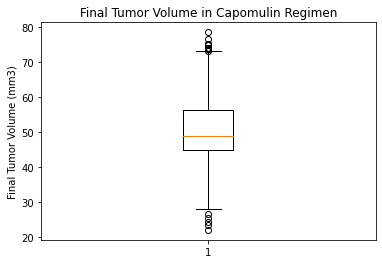

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

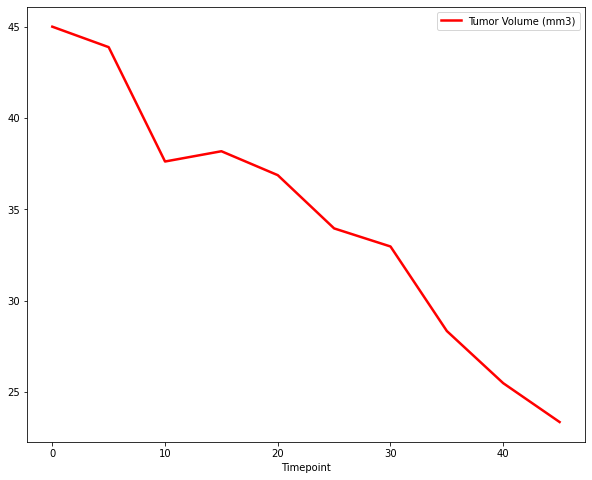

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = merge_df.loc[merge_df["Mouse ID"] == "s185"]
capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capo_mouse = capo_mouse.reset_index(drop=True)
capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")

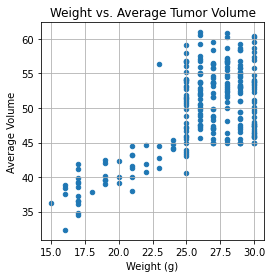

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = merge_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_capo.iloc[:,0]
avg_tumor_volume = avg_capo.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

TypeError: unsupported operand type(s) for +: 'float' and 'str'

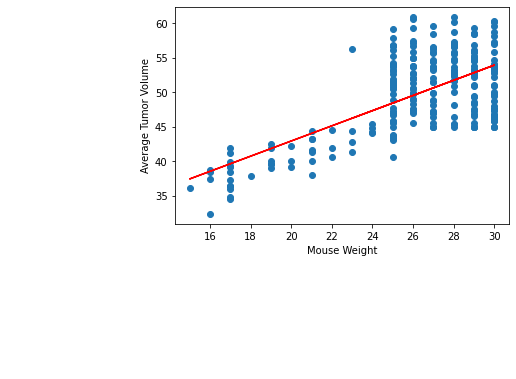

In [24]:
from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()